# Exploratory Data Analysis
Based on demo from lecture 2.

In [1]:
# Install packages
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("StatsPlots")
Pkg.add("PyPlot")

   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
# bring packages into main namespace
using DataFrames             # Data tables are called "DataFrames"
using StatsPlots             # load plotting packages 
using Statistics             # basic statistical functions
using CSV                    # tools for working with CSV files
# plotly() # good interactive html plotting tool
pyplot()   # good plotting tool for saving pdf figures

Plots.PyPlotBackend()

# Load data

In [3]:
acs = CSV.read("acs.csv") #, limit=10000) # read 10000 rows from the csv
head(acs)

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1
,String,Int64,Int64,Int64,Int64,String
1,Table 1a,2010,1,34614,33195,"Salt Lake City, UT"
2,Table 1a,1998,4,30189,31703,"Colorado Springs, CO"
3,Table 1a,1998,4,30198,30852,"Pittsburgh, PA"
4,Table 1a,2009,3,32211,32575,"Las Vegas, NV"
5,Table 1a,1993,4,30255,30852,"Huntsville, AL"
6,Table 1a,2010,4,33198,32575,"Kansas City, MO"


In [4]:
acs[:when] = acs[:Year] .+ ((acs[:quarter] .-1) ./ 4)

213175-element Array{Float64,1}:
 2010.0
 1998.75
 1998.75
 2009.5
 1993.75
 2010.75
 2007.25
 2003.25
 2005.75
 2014.75
 2001.0
 1993.0
 1998.75
    ⋮
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75
 2019.75

# Summary statistics

In [5]:
println(size(acs))
println(typeof(acs))
println(names(acs));
showall(head(acs))

(213175, 24)
DataFrame
["tbl", "Year", "quarter", "citymarketid_1", "citymarketid_2", "city1", "city2", "airportid_1", "airportid_2", "airport_1", "airport_2", "nsmiles", "passengers", "fare", "carrier_lg", "large_ms", "fare_lg", "carrier_low", "lf_ms", "fare_low", "Geocoded_City1", "Geocoded_City2", "tbl1apk", "when"]
6×24 DataFrame
│ Row │ tbl      │ Year  │ quarter │ citymarketid_1 │ citymarketid_2 │
│     │ String   │ Int64 │ Int64   │ Int64          │ Int64          │
├─────┼──────────┼───────┼─────────┼────────────────┼────────────────┤
│ 1   │ Table 1a │ 2010  │ 1       │ 34614          │ 33195          │
│ 2   │ Table 1a │ 1998  │ 4       │ 30189          │ 31703          │
│ 3   │ Table 1a │ 1998  │ 4       │ 30198          │ 30852          │
│ 4   │ Table 1a │ 2009  │ 3       │ 32211          │ 32575          │
│ 5   │ Table 1a │ 1993  │ 4       │ 30255          │ 30852          │
│ 6   │ Table 1a │ 2010  │ 4       │ 33198          │ 32575          │

│ Row │ city1           

In [6]:
# Build Airport -> Airport_ID dict
airport_to_id = Dict()
for i = 1:size(acs,1)
    row = acs[i,:]
    if ! haskey(airport_to_id, row[:airport_1])
        airport_to_id[row[:airport_1]] = row[:airportid_1]
    end
    if ! haskey(airport_to_id, row[:airport_2])
        airport_to_id[row[:airport_2]] = row[:airportid_2]
    end
end
@show airport_to_id

airport_to_id = Dict{Any,Any}("MPB" => 13439,"ORH" => 13933,"MAF" => 13158,"DFW" => 11298,"SAN" => 14679,"IAD" => 12264,"FLL" => 11697,"MYR" => 13577,"LGA" => 12953,"FNL" => 11719,"FNT" => 11721,"SRQ" => 14986,"EVV" => 11612,"BLI" => 10666,"HPN" => 12197,"SBN" => 14696,"STS" => 15023,"SEA" => 14747,"LCK" => 12917,"JAC" => 12441,"MSY" => 13495,"ICT" => 12278,"ROC" => 14576,"CGX" => 10977,"TUS" => 15376,"PDX" => 14057,"BFI" => 10559,"MSP" => 13487,"PVD" => 14307,"MRY" => 13476,"LIT" => 12992,"MDW" => 13232,"PAE" => 14004,"SFO" => 14771,"SYR" => 15096,"CAE" => 10868,"SNA" => 14908,"MCO" => 13204,"AMA" => 10279,"AGS" => 10208,"USA" => 12544,"PIA" => 14108,"SAC" => 14672,"AIY" => 10227,"SFB" => 14761,"SJC" => 14831,"PVU" => 14314,"RDU" => 14492,"EFD" => 11495,"MVY" => 13541,"DCA" => 11278,"LBE" => 12898,"SGF" => 14783,"LBB" => 12896,"ORF" => 13931,"FCA" => 11648,"BZN" => 10849,"BDL" => 10529,"SBS" => 14699,"TSS" => 15346,"DET" => 11295,"HSV" => 12217,"SMF" => 14893,"FWA" => 11823,"RNO" => 1

Dict{Any,Any} with 208 entries:
  "MPB" => 13439
  "ORH" => 13933
  "MAF" => 13158
  "DFW" => 11298
  "SAN" => 14679
  "IAD" => 12264
  "FLL" => 11697
  "MYR" => 13577
  "LGA" => 12953
  "FNL" => 11719
  "FNT" => 11721
  "SRQ" => 14986
  "EVV" => 11612
  "BLI" => 10666
  "HPN" => 12197
  "SBN" => 14696
  "STS" => 15023
  "SEA" => 14747
  "LCK" => 12917
  "JAC" => 12441
  "MSY" => 13495
  "ICT" => 12278
  "ROC" => 14576
  "CGX" => 10977
  "TUS" => 15376
  ⋮     => ⋮

In [7]:
fare = acs[:fare]; # Overall average fare
println("Overall average fare (mean, median, std)")
println(mean(fare))
println(median(fare))
println(std(fare))

fare_low = acs[:fare_low]; # Average fare for the lowest carrier
fare_low = fare_low[.!ismissing.(fare_low)]
println("\nAverage fare for the lowest carrier (mean, median, std)")
println(mean(fare_low))
println(median(fare_low))
println(std(fare_low))

fare_lg = acs[:fare_lg]; # Average fare for the carrier with the largest market share
fare_lg = fare_lg[.!ismissing.(fare_lg)]
println("\nAverage fare for the carrier with the largest market share (mean, median, std)")
println(mean(fare_lg))
println(median(fare_lg))
println(std(fare_lg))

Overall average fare (mean, median, std)
217.73721998358158
208.42
82.63151628703632

Average fare for the lowest carrier (mean, median, std)
190.17554171431811
181.08
73.1644790936143

Average fare for the carrier with the largest market share (mean, median, std)
217.49975798146238
207.07
84.42671673655438


In [8]:
from_nyc_idxs = acs[:airport_1].== "JFK"
to_sm_idxs = acs[:airport_2].== "SMF"
trip_idxs = from_nyc_idxs .& to_sm_idxs

nyc_to_sm = acs[trip_idxs,:]

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1
,String,Int64,Int64,Int64,Int64,String
1,Table 1a,2004,3,31703,33192,"New York City, NY (Metropolitan Area)"
2,Table 1a,2001,2,31703,33192,"New York City, NY (Metropolitan Area)"
3,Table 1a,2008,2,31703,33192,"New York City, NY (Metropolitan Area)"
4,Table 1a,2010,3,31703,33192,"New York City, NY (Metropolitan Area)"
5,Table 1a,2012,1,31703,33192,"New York City, NY (Metropolitan Area)"
6,Table 1a,1996,3,31703,33192,"New York City, NY (Metropolitan Area)"
7,Table 1a,2004,2,31703,33192,"New York City, NY (Metropolitan Area)"
8,Table 1a,2008,3,31703,33192,"New York City, NY (Metropolitan Area)"
9,Table 1a,1999,3,31703,33192,"New York City, NY (Metropolitan Area)"


# Plotting

In [15]:
function plotdata(x,y; xlab="x", ylab="y", margin=.05)
    scatter(x,y, label="data", legend=:topleft)
    xlabel!(xlab)
    ylabel!(ylab)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
    xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
end

plotdata (generic function with 1 method)

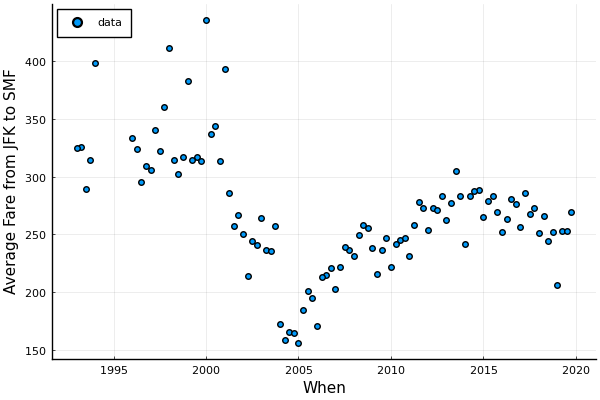

In [16]:
plotdata(nyc_to_sm[:when], nyc_to_sm[:fare], xlab="When", ylab="Average Fare from JFK to SMF")

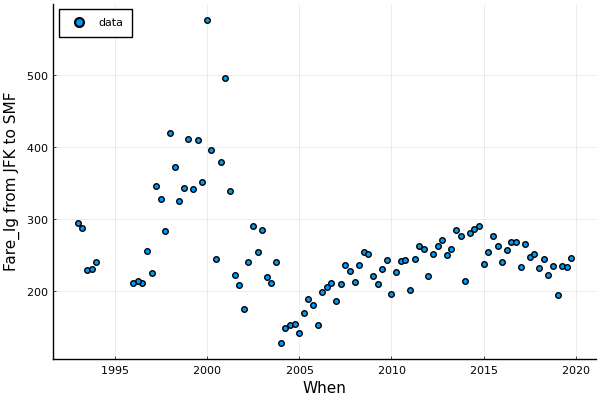

In [17]:
plotdata(nyc_to_sm[:when], nyc_to_sm[:fare_lg], xlab="When", ylab="Fare_lg from JFK to SMF")

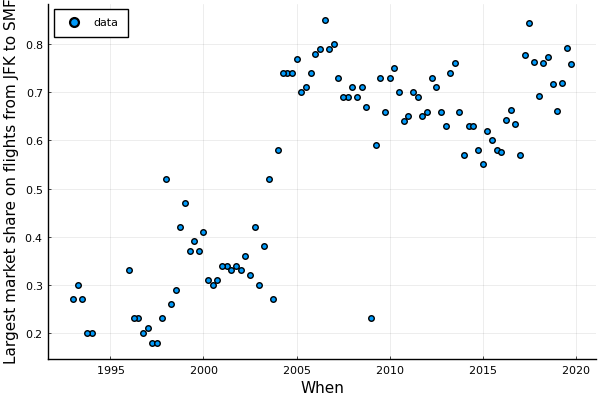

In [18]:
plotdata(nyc_to_sm[:when], nyc_to_sm[:large_ms], xlab="When", ylab="Largest market share on flights from JFK to SMF")

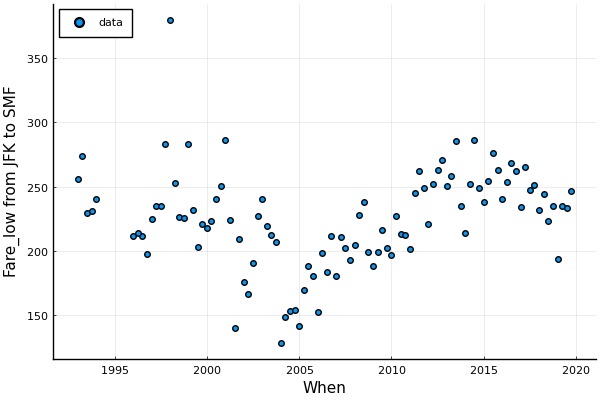

In [19]:
plotdata(nyc_to_sm[:when], nyc_to_sm[:fare_low], xlab="When", ylab="Fare_low from JFK to SMF")

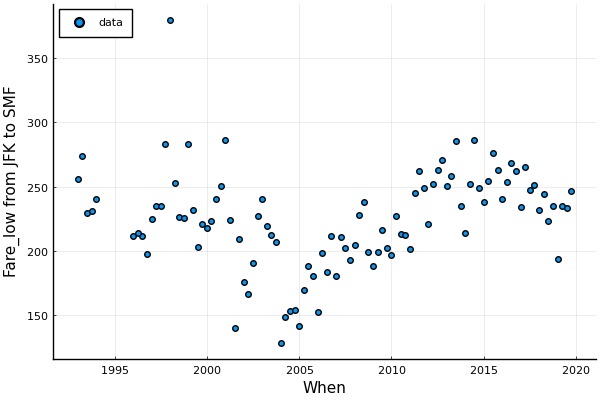

In [20]:
plotdata(nyc_to_sm[:when], nyc_to_sm[:fare_low], xlab="When", ylab="Fare_low from JFK to SMF")

In [21]:
using Random

In [22]:
acs[shuffle(1:nrow(acs))[1:10], :]

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1
,String,Int64,Int64,Int64,Int64,String
1,Table1a,2019,2,32575,33264,"Los Angeles, CA (Metropolitan Area)"
2,Table 1a,2002,4,32575,30466,"Los Angeles, CA (Metropolitan Area)"
3,Table 1a,2007,4,31453,34027,"Houston, TX"
4,Table 1a,1993,4,30257,32575,"Albany, NY"
5,Table 1a,2001,3,31295,31453,"Detroit, MI"
6,Table 1a,2008,4,31057,32575,"Charlotte, NC"
7,Table 1a,2003,4,32575,30852,"Los Angeles, CA (Metropolitan Area)"
8,Table 1a,2006,2,32575,33316,"Los Angeles, CA (Metropolitan Area)"
9,Table 1a,1998,2,32575,33667,"Los Angeles, CA (Metropolitan Area)"


In [23]:
acs = dropmissing(acs)
sample = acs[shuffle(1:nrow(acs))[1:1000], :]
label_real = [
    :fare, 
    :when, 
    :nsmiles, 
    :passengers, 
    :large_ms, 
    :fare_lg, 
    :lf_ms, 
    :fare_low
]
numerical_mat = convert(Matrix, sample[label_real])

1000×8 Array{Float64,2}:
 380.73  2004.0   1465.0   851.0  0.82   412.24  0.03    106.88
 208.37  1999.0   1671.0   109.0  0.3    202.66  0.13    193.35
 146.52  1996.5    946.0   202.0  0.67   144.44  0.2     144.43
 330.56  1993.0   2619.0    27.0  0.44   340.0   0.15    190.54
  78.9   2001.75   304.0   180.0  0.75    77.42  0.23     76.89
 309.29  2017.75  2510.0    49.0  0.356  316.74  0.2088  311.91
 104.77  2004.5    989.0  3518.0  0.34   108.3   0.19    102.24
 369.1   1993.75  2366.0    11.0  0.54   367.28  0.21    285.1
 205.44  2005.25  2457.0   238.0  0.27   204.07  0.12    202.5
 164.62  2005.5    563.0     3.0  0.48   137.43  0.48    137.43
 340.01  2001.25  2139.0  1104.0  0.57   386.37  0.57    386.37
 323.08  2010.75  2073.0     1.0  0.61   343.18  0.15    259.05
 179.37  2012.25   507.0  1142.0  0.47   190.69  0.22    164.47
   ⋮                                       ⋮             
 178.59  1993.25   928.0    13.0  0.6    175.15  0.31    172.67
 168.42  2015.5    459.

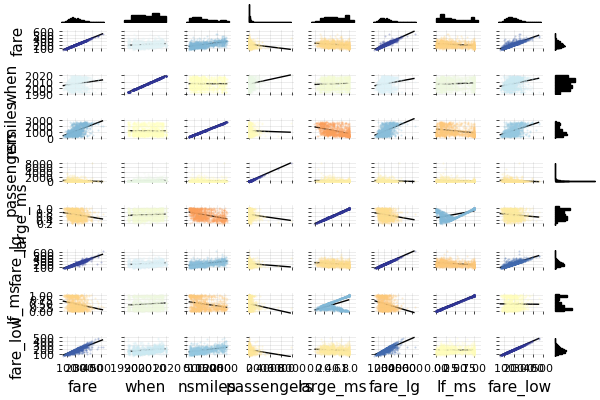

In [24]:
cornerplot(numerical_mat, label=["fare" "when" "nsmiles" "passengers" "large_ms" "fare_lg" "lf_ms" "fare_low"])

# Modeling


In [28]:
# Split the data into train and test
test_frac = .2
n = size(acs,1)
n_te = Int(round(n*test_frac))
n_tr = n - n_te
idxs = rand(1:n,n)

train = acs[idxs[1:n_tr],:]
test = acs[idxs[n_tr+1:n],:]
@assert size(acs,1) == size(train,1) + size(test,1)

# Learn from the train set
function get_Xy(dataset)
    X = [dataset[:when] dataset[:airportid_1] dataset[:airportid_2] ones(size(dataset,1))]
    y = dataset[:fare]
    return X,y
end
X_tr, y_tr = get_Xy(train)
X_te, y_te = get_Xy(test)

w = X_tr \ y_tr

# Look at the MSE
train_error = sqrt(mean((y_tr - X_tr*w).^2))
@show train_error

test_error = sqrt(mean((y_te - X_te*w).^2))
@show test_error;

train_error = 78.28091312123198
test_error = 77.38940513129742


# Histograms


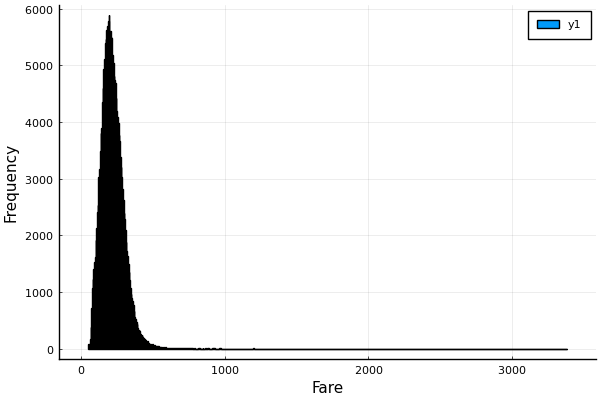

In [25]:
@df acs histogram(:fare)
xlabel!("Fare")
ylabel!("Frequency")

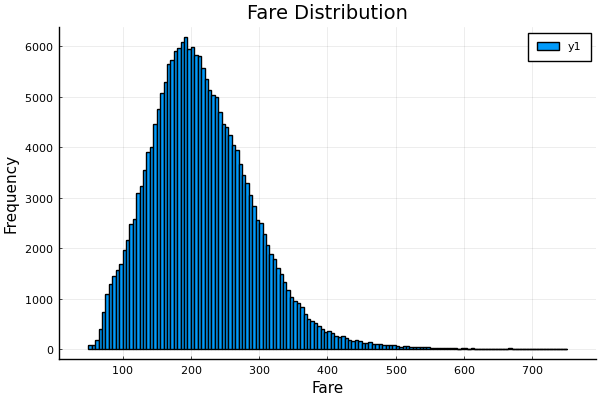

In [10]:
@df acs[ acs[:fare].<750,:  ] histogram(:fare)
xlabel!("Fare")
ylabel!("Frequency")
title!("Fare Distribution")

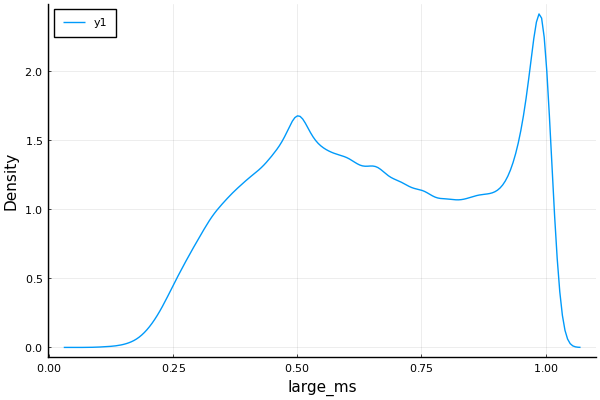

In [26]:
@df dropmissing(acs, :large_ms) density(:large_ms)
# histogram(acs[:large_ms], label="large_ms")
xlabel!("large_ms")
ylabel!("Density")

In [27]:
large_ms = acs[:large_ms] # Overall average fare
large_ms = large_ms[.!ismissing.(large_ms)]
println("large_ms (mean, median, std)")
println(mean(large_ms))
println(median(large_ms))
println(std(large_ms))

large_ms (mean, median, std)
0.6560351483673632
0.64
0.22501878464673025
